In [1]:
# relevant modules
import numpy as np
import os
import matplotlib.pyplot as plt

###  Exercise 1: A ball dropped from a tower

In [2]:
height = 100
def time_taken_to_reach_ground(height):
    time = (2*height/9.8)**0.5
    return time

time_taken_to_reach_ground(100)

4.5175395145262565

###  Exercise 2: Altitude of a satellite

#### a)

In [3]:
G = 6.6743E-11
M = 5.972E24
R = 6.371E6
def altitude_of_revol(time): # time in sec
    r = ((G*M)*time**2/(4*np.pi**2))**(1/3)
    alt = r - R
    return alt

#### b)

In [4]:
print(f"Altitude every 24 hrs is {altitude_of_revol(24 * 3600)/ 1000:.3f} km")

print(f"Altitude every 90 mins is {altitude_of_revol(90 * 60)/ 1000:.3f} km")

print(f"Altitude every 45 mins is {altitude_of_revol(45 * 60)/1000:.3f} km")

Altitude every 24 hrs is 35869.698 km
Altitude every 90 mins is 281.493 km
Altitude every 45 mins is -2180.192 km


From the last calculation, we conclude that for a satellite to revolve so fast, it should be closer to the centre of the earth than the radius of the earth due to strong requirement of centripital force.

#### c)
24 hrs is time taken for Sun to be in the same position wrt stars (solar day) whlie 23.93 hrs is the time it takes for the Earth to actually rotate wrt the to the stars.

In [5]:
print(f"Difference of altitude between the two orbits is {(altitude_of_revol(24*3600) - altitude_of_revol(23.93 * 3600))/1000:.3f} km")

Difference of altitude between the two orbits is 82.175 km


### Exercise 3

In [6]:
def polar_coords(x, y):
    r = (x**2 + y**2)**0.5
    theta = np.arctan(y/x)*180.0/np.pi
    return r, theta 

r, theta = polar_coords(1,2)
print(f"Polar coordinates of (1,2) are {(r, theta)}")

Polar coordinates of (1,2) are (2.23606797749979, 63.43494882292201)


###  Exercise 4

In [7]:
def time_wrt_rest(x, v):
    return x/v # time in years

def time_wrt_traveller(x, v):
    gamma = 1/(1- v**2)**0.5
    return x/v/gamma

print(f"Time taken to travel 10 light years at 0.99c is {time_wrt_rest(10, 0.99):.3f} years in rest frame and {time_wrt_traveller(10, 0.99):.3f} years in passengers's frame.")   

Time taken to travel 10 light years at 0.99c is 10.101 years in rest frame and 1.425 years in passengers's frame.


###  Exercise 5: Quantum potential step

In [8]:
def quantum_step(m, E, V):
    h_bar = 1.05E-34
    E *= 1.6E-19 # conversion to joule 
    V *= 1.6E-19
    k1 = ((2*m/h_bar)*(E/h_bar))**0.5
    k2 = ((2*m/h_bar)*(E - V)/h_bar)**0.5
    reflection_prob = ((k1 - k2)/(k1 + k2))**2
    transmission_prob = 4*k1*k2/(k1 + k2)**2
    return reflection_prob, transmission_prob

refl_prob, transm_prb = quantum_step(9.11E-31, 10, 9)
print(f"For the given values of mass, energy and potential, the reflection probability is {refl_prob:.3f} and transmission probability is {transm_prb:.3f}")


For the given values of mass, energy and potential, the reflection probability is 0.270 and transmission probability is 0.730


### Exercise 6: Catalan numbers

In [9]:
def catalan_numbers(upper_bound):
    C_n = 1
    n = 0
    while C_n <= upper_bound:
        print(C_n)
        C_n *= (4*n + 2)/(n + 2)
        n += 1

catalan_numbers(1E9)

1
1.0
2.0
5.0
14.0
42.0
132.0
429.0
1430.0
4862.0
16796.0
58786.0
208012.0
742900.0
2674440.0
9694845.0
35357670.0
129644790.0
477638700.0


###  Exercise 7: The Madelung constant

In [10]:
def potential(i, j, k):
    # const = e/(4*pi*epsilon_not) = 1
    potential = 1/(i**2 + j**2 + k**2)**0.5
    return potential

def total_potential_old(lower, upper):
    V = 0
    for i in range(lower, upper):
        for j in range(lower, upper):
            for k in range(lower, upper):
                if (i,j,k) != (0,0,0):
                    if (i + j + k) % 2 == 0:
                        V += potential(i, j, k)
                    else: 
                        V -= potential(i, j, k)
    return V

def total_potential(lower, upper):
    indices = np.arange(lower, upper)
    i, j, k = np.meshgrid(indices, indices, indices, indexing='ij')
    indices_not_origin = (i != 0) | (j != 0) | (k != 0)
    potentials = potential(i, j, k)
    sign = np.where((i + j + k)%2 == 0, 1, -1)
    V = np.sum(sign[indices_not_origin] * potentials[indices_not_origin])
    return V

total_potential(-100, 100)
print(f"The value of Madelung constant is estimated as {total_potential(-100, 100):.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_25528\2687773383.py:3: RuntimeWarning: divide by zero encountered in divide
  potential = 1/(i**2 + j**2 + k**2)**0.5


The value of Madelung constant is estimated as -1.7476


###  Exercise 8: The semi-empirical mass formula
#### a)

In [11]:
def binding_energy(A, Z):
    a1, a2, a3, a4 = 15.67, 17.23, 0.75, 93.4
    if A % 2 == 0:
        a5 = 0.0
    else:
        if Z % 2 == 0:
            a5 = 12.0
        else:
            a5 = -12.0
    B = a1*A - a2*A**(2/3) - a3* Z**2 /A**(1/3) - a4*(A -2*Z)**2/A + a5/A**0.5
    return B

print(f" Binding energy for A = 58 and Z = 28 is {binding_energy(58, 28):.3f} MeV")
    

 Binding energy for A = 58 and Z = 28 is 492.346 MeV


#### b)

In [12]:
def binding_energy_per_nucleon(A, Z):
    # vectorized code for efficiency
    A, Z = np.asarray(A), np.asarray(Z)
    a1, a2, a3, a4 = 15.67, 17.23, 0.75, 93.4
    a5 = np.zeros_like(A) 
    even_A = (A % 2 == 0)
    even_Z = (Z % 2 == 0)
    a5[~even_A & even_Z] = 12.0   # Odd A, even Z
    a5[~even_A & ~even_Z] = -12.0 # Odd A, odd Z
    B = a1*A - a2*A**(2/3) - a3* Z**2 /A**(1/3) - a4*(A -2*Z)**2/A + a5/A**0.5
    return B/A
print(f" Binding energy per nucleon for A = 58 and Z = 28 is {binding_energy_per_nucleon(58, 28):.3f} MeV/n")

 Binding energy per nucleon for A = 58 and Z = 28 is 8.489 MeV/n


#### c)

In [13]:
def stable_nucleus_A(Z):
    A_array = np.arange(Z, 3*Z+1)
    B_per_nucleons = binding_energy_per_nucleon(A_array, Z)

    return A_array[np.argmax(B_per_nucleons)], B_per_nucleons[np.argmax(B_per_nucleons)], B_per_nucleons

A, B, Barray = stable_nucleus_A(28)
print(A, B)

57 8.511600524573389


#### d)

In [14]:
def stable_nucleus_A_100(Z):
    A_array = np.arange(1, 101)
    B_per_nucleons = binding_energy_per_nucleon(A_array, Z)
    return A_array[np.argmax(B_per_nucleons)], B_per_nucleons[np.argmax(B_per_nucleons)], B_per_nucleons

A, B, Barray = stable_nucleus_A_100(28)
print(A, B)
# fuck fix this

57 8.511600524573389


### Exercise 9: Binomial coefficients
#### a)

In [15]:
def factorial(n):
    return int(np.prod(np.arange(1, n+1)))

def nCr_old(n, k): # overflows and dies 
    if n < k:
        return 0
    return int(factorial(n)/ (factorial(n - k) * factorial(k)))

def nCr(n, k):
    if n < k:
        return 0
    if k == 0 | n == k:
        return 1
    k = min(k, n-k)
    output = 1
    for i in range(1, k+1): 
        output *= (n - i + 1)/(i)
    return int(np.rint(output))
nCr(20, 1)

20

#### b)

In [16]:
def print_pascal(N):
    for n in np.arange(N+1):
        row = [nCr(n, k) for k in np.arange(n+1)]
        print(" ".join(map(str, row)))

print_pascal(20)

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1


#### c)

In [17]:
def coin_toss_nk_prob(n, k):
    return nCr(n, k)/2**n

def prob_head(N, K):
    array = np.array([coin_toss_nk_prob(N, k) for k in np.arange(K, N+1)])
    return array.sum()

print(f"Probability of getting 60 of 100 tosses as heads is {coin_toss_nk_prob(100, 60):.3f}")
print(f"Probability of getting 60 or more of 100 tosses as heads is {prob_head(100, 60):.3f}")

Probability of getting 60 of 100 tosses as heads is 0.011
Probability of getting 60 or more of 100 tosses as heads is 0.028


###  Exercise 10: Plotting experimental data
#### a)

In [18]:
# open file
time, sunspots = [], [] 
with open("data/sunspots.txt") as f:
    for line in f:
        row = line.strip().split("\t")
        time.append(row[0])
        sunspots.append(row[1])

#### b)

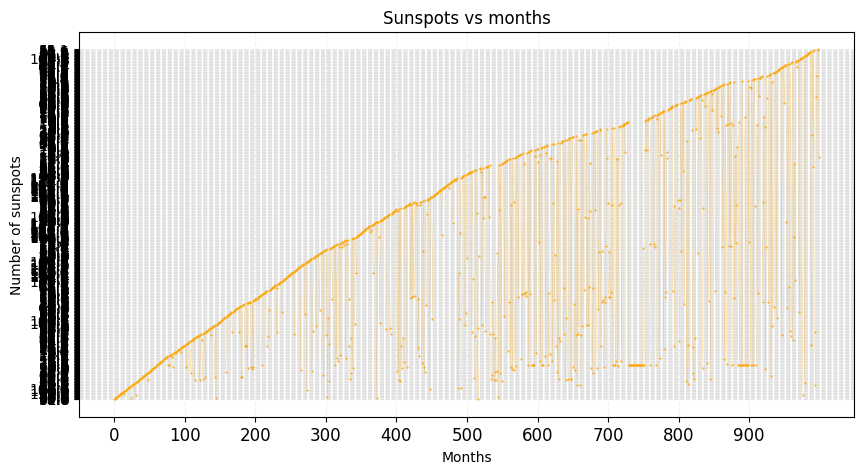

In [47]:
plt.figure(figsize=(10,5))
plt.plot(sunspots[:1000],color='orange', linewidth=0.1, marker='.', markersize=1, label="Sunspots")
plt.xticks()
plt.title("Sunspots vs months")
plt.xlabel("Months")
plt.ylabel("Number of sunspots")
plt.grid(True, linestyle='--', alpha=0.2)
x_ticks_positions = range(0, 1000, 100)
plt.xticks(x_ticks_positions, fontsize=12)
y_tick_positions = range(0, 1000, 100)
# plt.ylim(0, 37)
# plt.yticks(y_tick_positions)

plt.show()